Note book to capture the images that will be used to train the model

In [1]:
import numpy as np

import ipywidgets as widgets
from ipywidgets import HBox
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from jetcam.csi_camera import CSICamera

import time

In [2]:
# create the camera object
camera = CSICamera(width=224, height=224, capture_width=1080, capture_height=720, capture_fps=30)

In [3]:
# variable to store the captured images and the current image
imageList = []
currentImg = None

In [4]:
# read the camera and set to running. This will mean that we will only have to get the last value of the camera to get
# the latest frame
img = camera.read()
camera.running = True

# rotate the image and convert to butes for the display widget
img = cv2.rotate(img, cv2.ROTATE_180)
is_success, im_buf_arr = cv2.imencode(".jpg", img)
img = im_buf_arr.tobytes()

Create all of the widgets for the capture of the images

In [5]:
# start track button widget
trackButton = widgets.Button(
                    description='Track',
                    disabled=False,
                    button_style='', # 'success', 'info', 'warning', 'danger' or ''
                    tooltip='Track',
                    icon='check' # (FontAwesome names without the `fa-` prefix)
                )

# create the output widget for text message
output = widgets.Output()

# create the image display widget
imgDisp = widgets.Image(
            value=img,
            format='png',
            width=300,
            height=400,
        )

# display to the screen the widgets
display(trackButton, output, imgDisp)
        

# function associated with the start of the tracking    
def on_button_clicked(b):
    with output:
        
        # perform for 300 images
        for i in range(300):
        
            # get image from the camera
            img = camera.value
            img_rotate_180 = cv2.rotate(img, cv2.ROTATE_180)

            # rotate the image
            currentImg = img_rotate_180

            # convert the image to binary for export to widget
            is_success, im_buf_arr = cv2.imencode(".jpg", img_rotate_180)
            byte_im = im_buf_arr.tobytes()

            # print the frame number to the screen
            output.clear_output()
            print("Frame : "+str(i))

            # display the image
            imgDisp.value = byte_im

            # add the image to list of captured images
            imageList.append(currentImg)
    
            time.sleep(0.1)

        
trackButton.on_click(on_button_clicked)


Button(description='Track', icon='check', style=ButtonStyle(), tooltip='Track')

Output()

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

In [6]:
exportButton = widgets.Button(
                    description='Export',
                    disabled=False,
                    button_style='', # 'success', 'info', 'warning', 'danger' or ''
                    tooltip='Export',
                    icon='check' # (FontAwesome names without the `fa-` prefix)
                )


# create the output widget for text message
output2 = widgets.Output()


# display to the screen the widgets
display(exportButton, output2)

# function to export to a file the captured images
def on_export_clicked(b):
    with output2:
        
        images = np.array(imageList)
        
        print('Exporting the data')
        
        
        np.save('./trackImagesTemp.npy', images)
       
        print('Finished exporting the data')

        
exportButton.on_click(on_export_clicked)

Button(description='Export', icon='check', style=ButtonStyle(), tooltip='Export')

Output()

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


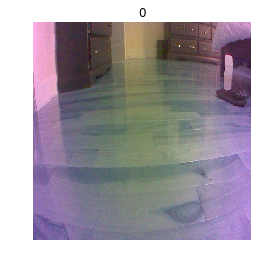

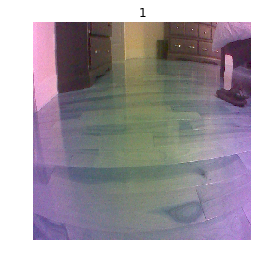

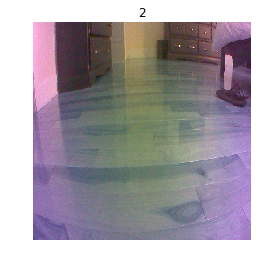

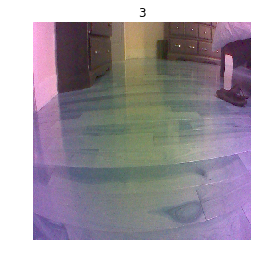

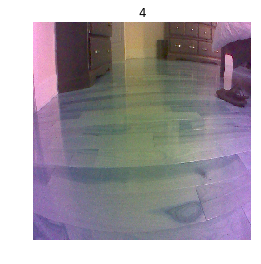

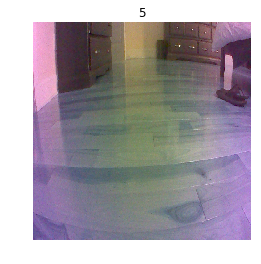

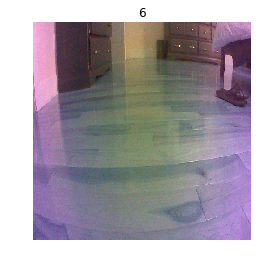

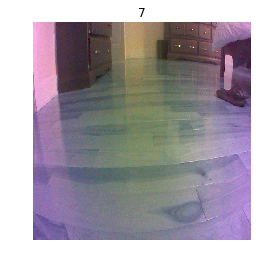

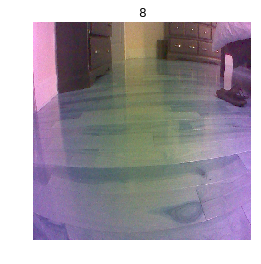

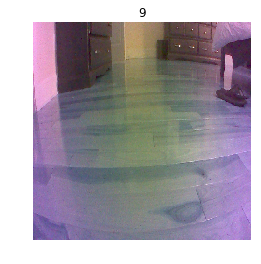

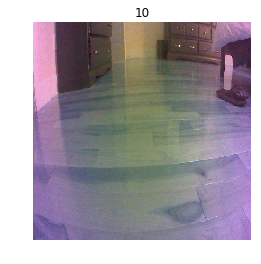

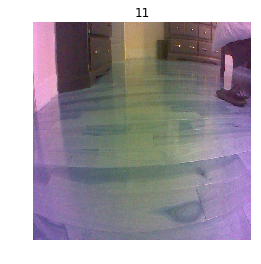

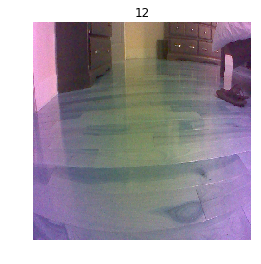

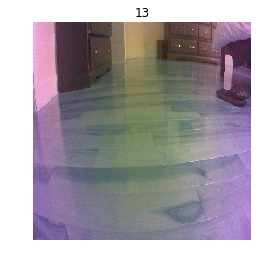

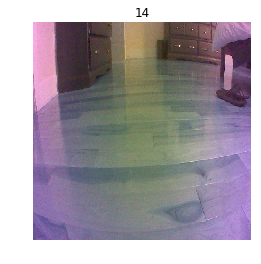

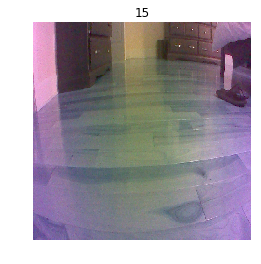

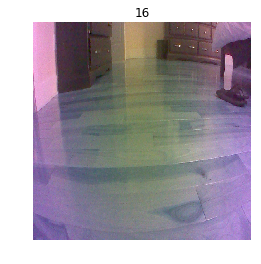

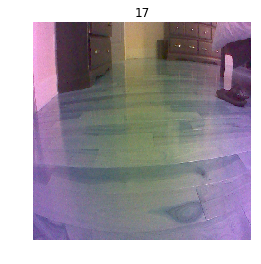

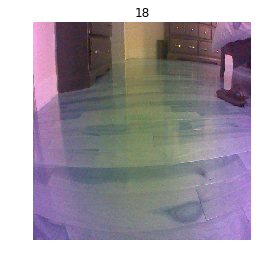

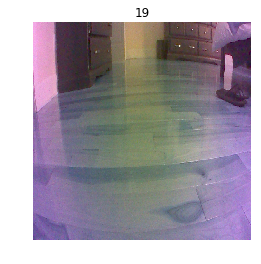

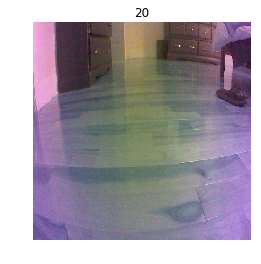

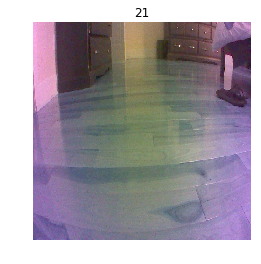

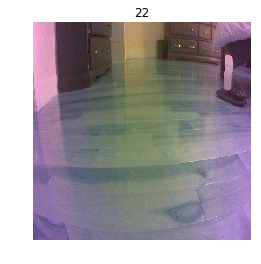

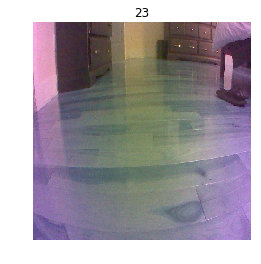

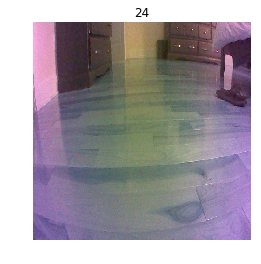

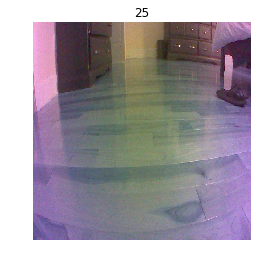

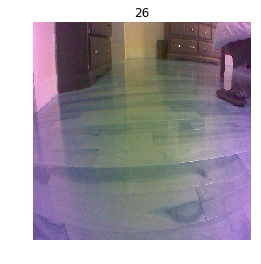

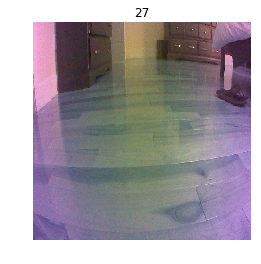

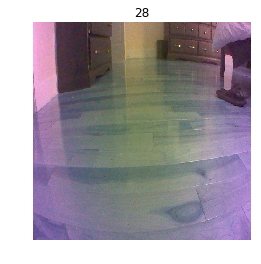

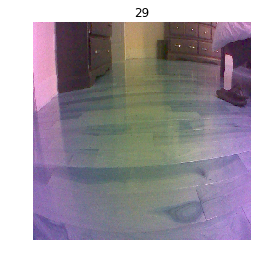

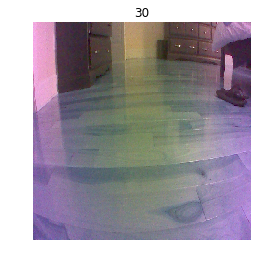

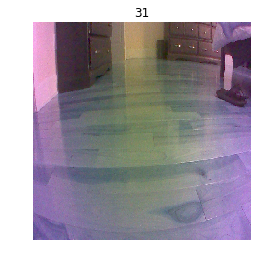

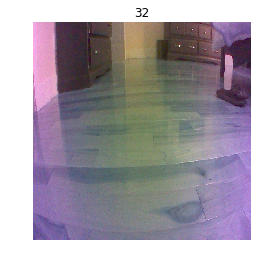

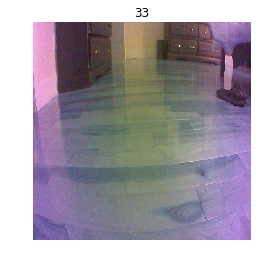

Error in callback <function flush_figures at 0x7f72e7cae8> (for post_execute):


KeyboardInterrupt: 

In [7]:
# show all of the captured images
for i in range(len(imageList)):
    
    plt.figure()
    imgplot = plt.imshow(imageList[i])
    plt.axis('off')
    plt.title(str(i))
  